In [ ]:
# Import Needed Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Reading the Data

cols_type = {
    'Driver id': str
}

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data/Uber Request Data.csv', dtype = cols_type)
df.head(10)

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47
5,3879,Airport,1,Trip Completed,13-07-2016 21:57:28,13-07-2016 22:28:59
6,4270,Airport,1,Trip Completed,14-07-2016 06:15:32,14-07-2016 07:13:15
7,5510,Airport,1,Trip Completed,15-07-2016 05:11:52,15-07-2016 06:07:52
8,6248,City,1,Trip Completed,15-07-2016 17:57:27,15-07-2016 18:50:51
9,267,City,2,Trip Completed,11/7/2016 6:46,11/7/2016 7:25


In [ ]:
######## Data Cleaning & Transformation ########

# Changing Data Types
df['Request timestamp'] = pd.to_datetime(df['Request timestamp'])
df['Drop timestamp'] = pd.to_datetime(df['Drop timestamp'])

# Adding Year, Month, Day
df['year'] = df['Request timestamp'].dt.year
df['month'] = df['Request timestamp'].dt.month
df['day'] = df['Request timestamp'].dt.day

# Add driver Status Columns to be "No Data" if Driver id = NaN
## Creating the Condition
condition = df['Driver id'].isnull() == True
## Applying the Condition to new column
df['Driver_Status'] = condition.apply(lambda x: 'No Data' if x else 'Valid')

# ## Could be done as well with the below sample for data to add new column based on a condition
# import pandas as pd
# import numpy as np

# # Sample DataFrame
# data = {'Name': ['Alice', 'Bob', 'Charlie'],
#         'Age': [25, 30, 35]}
# df = pd.DataFrame(data)

# # Add a new column based on a condition using numpy.where
# df['Status'] = np.where(df['Age'] >= 30, 'Senior', 'Junior')

# # Show the DataFrame with the new column
# print(df)

# import pandas as pd

# # Sample DataFrame
# data = {'Name': ['Alice', 'Bob', 'Charlie'],
#         'Age': [25, 30, 35]}
# df = pd.DataFrame(data)

# # Define a function to apply the condition
# def get_status(age):
#     if age >= 30:
#         return 'Senior'
#     else:
#         return 'Junior'

# # Add a new column based on a condition using apply
# df['Status'] = df['Age'].apply(get_status)

# # Show the DataFrame with the new column
# print(df)

# Check the DataFrame
df

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,year,month,day,Driver_Status
0,619,Airport,1,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00,2016,11,7,Valid
1,867,Airport,1,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00,2016,11,7,Valid
2,1807,City,1,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00,2016,12,7,Valid
3,2532,Airport,1,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00,2016,12,7,Valid
4,3112,City,1,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,2016,7,13,Valid
...,...,...,...,...,...,...,...,...,...,...
6740,6745,City,NaN,No Cars Available,2016-07-15 23:49:03,NaT,2016,7,15,No Data
6741,6752,Airport,NaN,No Cars Available,2016-07-15 23:50:05,NaT,2016,7,15,No Data
6742,6751,City,NaN,No Cars Available,2016-07-15 23:52:06,NaT,2016,7,15,No Data
6743,6754,City,NaN,No Cars Available,2016-07-15 23:54:39,NaT,2016,7,15,No Data


# Business Questions
---

For each Questions will show it as:

*   Table
*   Visual



## 1- Number of Trips for each Status

Business Conclusion \
* Only 42% of the total trips are completed.
* 39% of the trips are canceled due to lack in the cars availability.
* 18% of the trips are cancelled.

In [ ]:
df['Status'].value_counts()

Trip Completed       2831
No Cars Available    2650
Cancelled            1264
Name: Status, dtype: int64

In [ ]:
# Assuming df is your DataFrame
status_counts = df['Status'].value_counts()
total_entries = len(df['Status'])

# Calculate percentages
status_percentages = (status_counts / total_entries) * 100

print(status_percentages)

Trip Completed       41.971831
No Cars Available    39.288362
Cancelled            18.739807
Name: Status, dtype: float64


Text(0.5, 1.0, 'No of Trips by Staus')

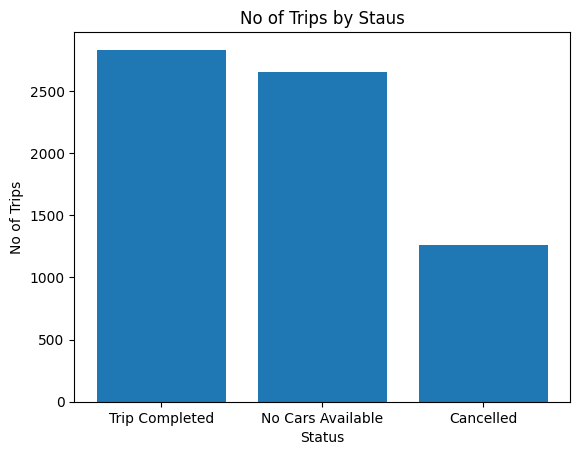

In [ ]:
# Let's see it as charts
plt.bar(status_counts.index,
         status_counts,
         )

plt.xlabel('Status')
plt.ylabel('No of Trips')
plt.title('No of Trips by Staus')


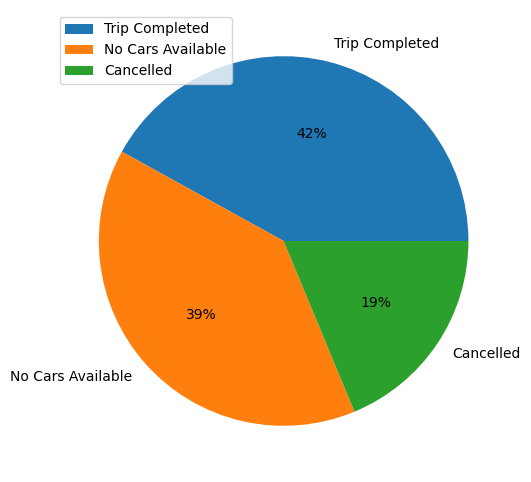

In [ ]:
plt.figure(figsize = (8,6))
plt.pie(status_counts,
        labels = status_counts.index,
        autopct='%1.0f%%'
        )
plt.legend(loc = 'upper left')

## 2- Let check the location of the 39% of the unavailable cars to focus on it.

Business Conclusion \
* We can focus to make more cars available at the airport.

In [ ]:
# Show it as absolute values
cancelled_trips_df = df[df['Status'] == 'No Cars Available']
total_records = len(cancelled_trips_df['Status'])
pickup = cancelled_trips_df['Pickup point'].value_counts()

# Show it as percentages
percentage = (pickup/total_records) * 100
formatted_percentage = percentage.map("{:.0f}%".format)
formatted_percentage

Airport    65%
City       35%
Name: Pickup point, dtype: object

In [ ]:
check = pd.pivot_table(
    cancelled_trips_df,
    index = ['Status','month'],
    values = 'Request id',
    aggfunc = 'count'
)

# Reset index to convert it into normal columns
check = check.reset_index()

,Status,month,Request id
0,No Cars Available,7,1641
1,No Cars Available,11,504
2,No Cars Available,12,505


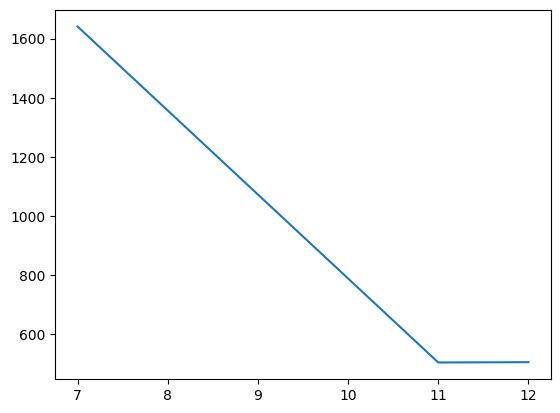

In [ ]:
# Draw the line chart

plt.plot(
    check['month'],
    check['Request id']
)

In [ ]:
test = pd.pivot_table(
    df,
    index = ['Status','month'],
    values = 'Request id',
    aggfunc = 'count'
)

# Reset index to convert it into normal columns
test = test.reset_index()

test

,Status,month,Request id
0,Cancelled,7,762
1,Cancelled,11,262
2,Cancelled,12,240
3,No Cars Available,7,1641
4,No Cars Available,11,504
5,No Cars Available,12,505
6,Trip Completed,7,1668
7,Trip Completed,11,601
8,Trip Completed,12,562


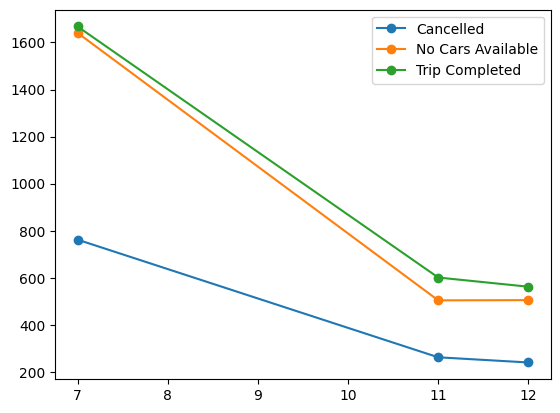

In [ ]:
# Using Matplotlib

# Initialize an empty list to store labels
labels = []

for status in test['Status'].unique():
  plt.plot(
      test[test['Status'] == status]['month'],
      test[test['Status'] == status]['Request id'],
      marker = 'o'
  )
  labels.append(status)

plt.legend(labels)

<Axes: xlabel='month', ylabel='Request id'>

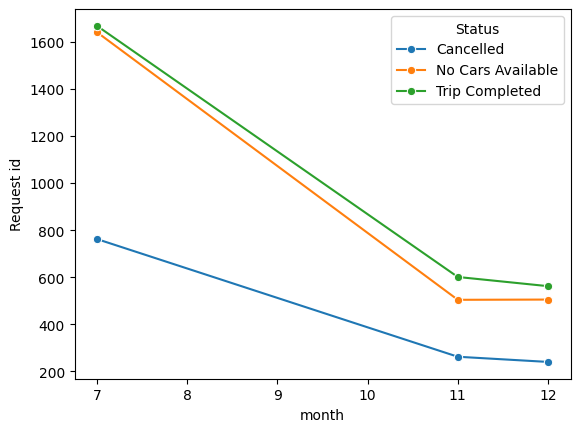

In [ ]:
# Using Seaborn

sns.lineplot(
    data = test,
    x = 'month',
    y = 'Request id',
    hue = 'Status',
    marker = 'o'
)